In [ ]:
import tensorflow as tf
from tensorflow import keras as k
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# sklearn is a framework for machine learning: we use it here for dataset
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [ ]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
x, y = data['data'], data['target']
x.shape

(569, 30)

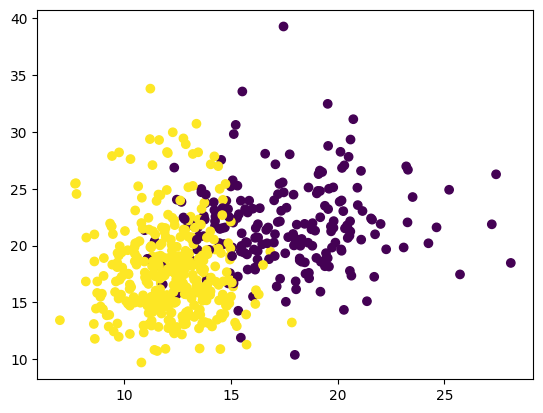

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c = y)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 16)                496       
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


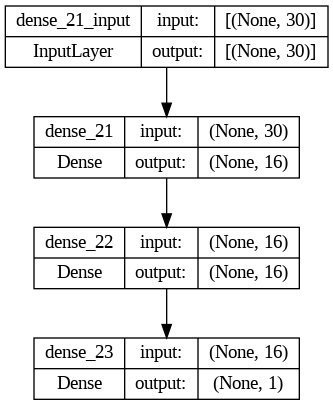

In [ ]:
model = k.Sequential([
    k.layers.Dense(16, activation = k.activations.relu, input_shape = [30]),
    k.layers.Dense(16, activation = k.activations.relu),
    k.layers.Dense(1, activation = k.activations.sigmoid)
])
model.summary()
k.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer = k.optimizers.Adam(), loss = k.losses.binary_crossentropy, metrics = [k.metrics.binary_accuracy])

In [ ]:
epochs = 1000
model.fit(x, y, epochs = epochs)

Epoch 1/1000
18/18 [==============================] - 1s 2ms/step - loss: 15.1488 - binary_accuracy: 0.4938
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 2.8291 - binary_accuracy: 0.5975
Epoch 3/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6264 - binary_accuracy: 0.7909
Epoch 4/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3410 - binary_accuracy: 0.8699
Epoch 5/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2964 - binary_accuracy: 0.8928
Epoch 6/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2922 - binary_accuracy: 0.8928
Epoch 7/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3190 - binary_accuracy: 0.8893
Epoch 8/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2706 - binary_accuracy: 0.9156
Epoch 9/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2411 - binary_accuracy: 0.9086
Epoch 10/1000
18/18 [===============

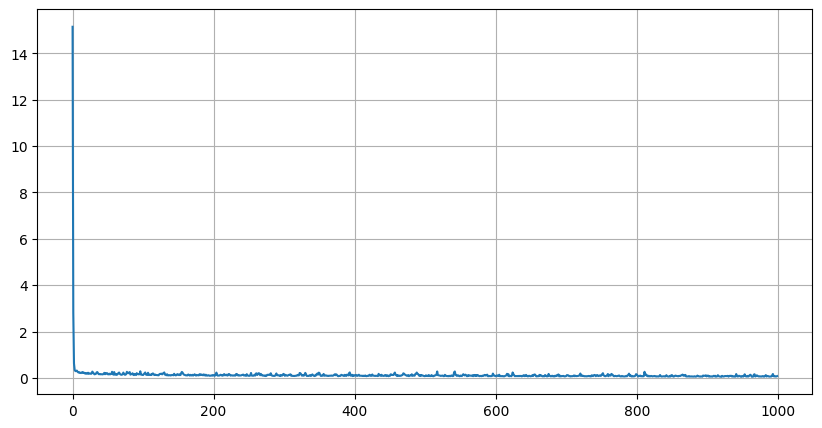

In [ ]:
# Plot Loss
plt.figure(figsize=(10,5))
plt.plot(range(epochs), model.history.history['loss'])
plt.grid(True)

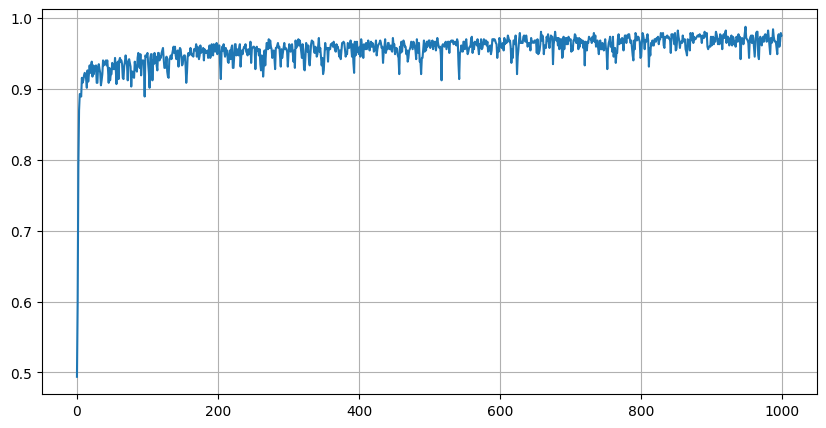

In [ ]:
# Plot Binary Accuracy
plt.figure(figsize=(10,5))
plt.plot(range(epochs), model.history.history['binary_accuracy'])
plt.grid(True)

In [ ]:
# Predict class probability
y_prob = model.predict(x)

18/18 [==============================] - 0s 2ms/step


In [ ]:
# Predict class
y_class = np.where(y_prob[:,0] >= 0.5, 1, 0)

# Estimate Binary Accuracy
k.metrics.binary_accuracy(y, y_class)

<tf.Tensor: shape=(), dtype=float32, numpy=0.97539544>